This Notebook contains code for Part 2 and Part 3. Project done by Meghana Vasudeva Person #: 50290586

# PART 2 Build multi-layer Neural Network with open-source neural-network library, Keras on Fashion-MNIST dataset

In [2]:
#Library Import for task 2 and 3.
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import util_mnist_reader
np.random.seed(12345)
%matplotlib inline

In [3]:
# Read Fashion MNIST dataset

X_train, y_train = util_mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('fashion', kind='t10k')


In [123]:
#Converting the Fashion MNIST dataset into CSV file for ease of operations 

def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("train-images-idx3-ubyte", "train-labels-idx1-ubyte",
        "fashion-mnist_train.csv", 60000)
convert("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte",
        "fashion-mnist_test.csv", 10000)

In [143]:
#Loading the data
batch_size = 512
train_data = np.array(pd.read_csv('fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv('fashion-mnist_test.csv'))

In [144]:
#Data Preprocessing
print(train_data.shape)
print(test_data.shape)
train_data[:, 0]

(60000, 785)
(10000, 785)


array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [145]:
#Splitting the data into Train|Test|validation
X_train_orig = train_data[:, 1:785]
y_train_orig = train_data[:, 0]
X_test = train_data[:, 1:785]
y_test = train_data[:, 0]

In [146]:
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [147]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(60000, 784)
(60000,)


In [148]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [149]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [133]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [269]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)
(60000, 28, 28, 1)
(60000,)


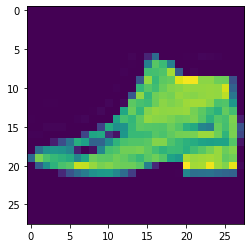

In [151]:
plt.imshow(X_train[2, :].reshape((28, 28)))


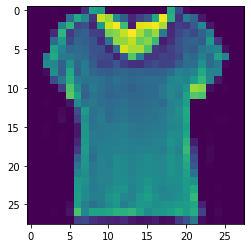

In [152]:
plt.imshow(X_train[100, :].reshape((28, 28)))

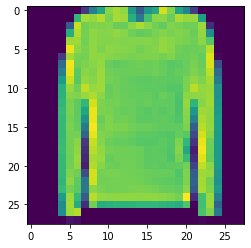

In [153]:
plt.imshow(X_train[300, :].reshape((28, 28)))

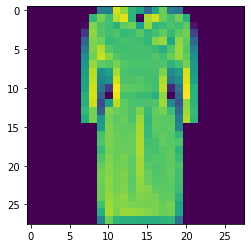

In [154]:
plt.imshow(X_train[1800, :].reshape((28, 28)))

In [155]:
#Build Model
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [157]:
#Compile Model
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [158]:
#Evaluate Model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.6338 - acc: 0.7824 - val_loss: 0.4458 - val_acc: 0.8487
Epoch 2/50
48000/48000 [==============================] - 2s 31us/step - loss: 0.4243 - acc: 0.8492 - val_loss: 0.3895 - val_acc: 0.8630
Epoch 3/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.3749 - acc: 0.8662 - val_loss: 0.3559 - val_acc: 0.8740
Epoch 4/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.3438 - acc: 0.8762 - val_loss: 0.3464 - val_acc: 0.8774
Epoch 5/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.3183 - acc: 0.8851 - val_loss: 0.3197 - val_acc: 0.8848
Epoch 6/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.2964 - acc: 0.8922 - val_loss: 0.3152 - val_acc: 0.8833
Epoch 7/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.2816 - acc: 0.8971 - val_loss: 0.3190 - val_acc

In [159]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11822070961284141
Test accuracy: 0.9654333333333334


In [160]:
#Vizualize Model
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

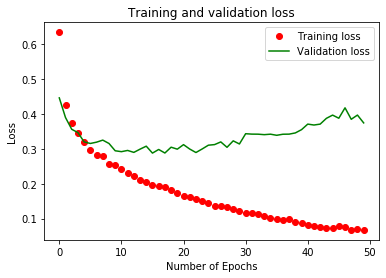

In [161]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

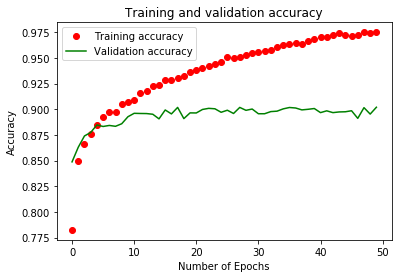

<Figure size 432x288 with 0 Axes>

In [162]:
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend()
plt.figure()

In [246]:
#Confusion matrix on Multi-layer neural network
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

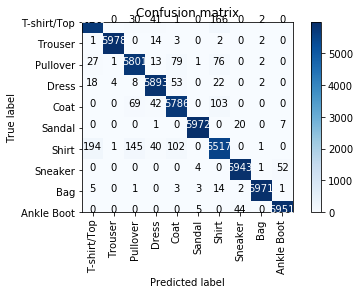

In [247]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix 
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [248]:
#Prediction of correct classes
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == y_test[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : T-shirt/top\nActual Label : T-shirt/top')

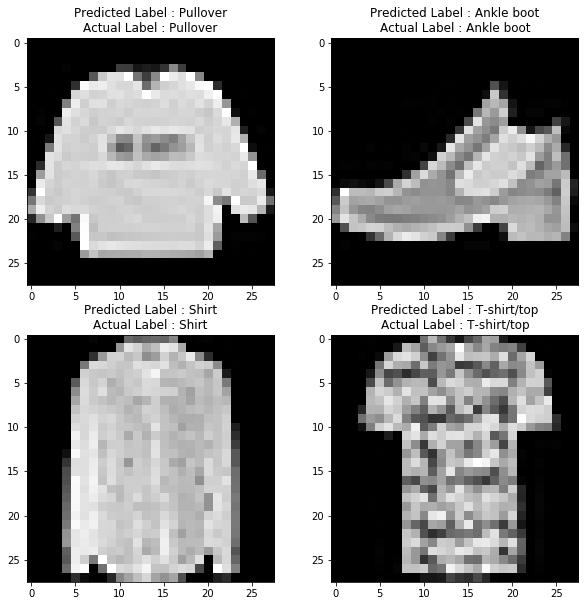

In [249]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[correct[0]]]))
ax[0,1].imshow(X_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[correct[1]]]))
ax[1,0].imshow(X_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[correct[2]]]))
ax[1,1].imshow(X_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[correct[3]]]))

In [215]:
#Prediction of incorrect classes
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == y_test[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Dress\nActual Label : Shirt')

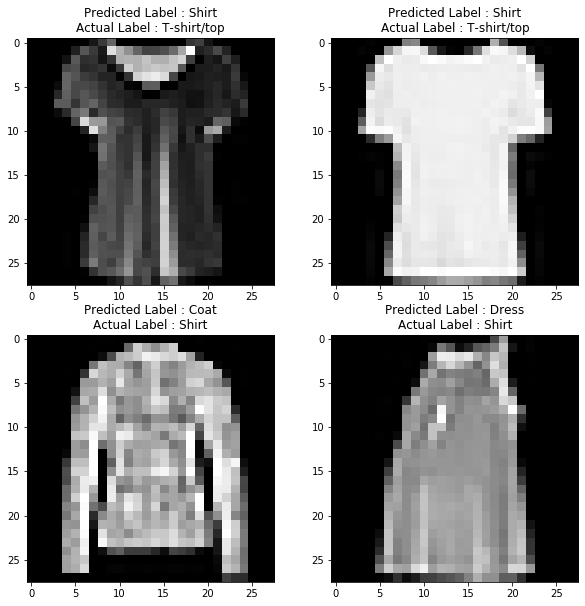

In [216]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[incorrect[0]]]))
ax[0,1].imshow(X_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[incorrect[1]]]))
ax[1,0].imshow(X_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[incorrect[2]]]))
ax[1,1].imshow(X_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test[incorrect[3]]]))

In [250]:
#classification report precision recall f1-score support
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(y_test, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.96      0.96      0.96      6000
     Trouser       1.00      1.00      1.00      6000
    Pullover       0.96      0.97      0.96      6000
       Dress       0.98      0.98      0.98      6000
        Coat       0.96      0.96      0.96      6000
      Sandal       1.00      1.00      1.00      6000
       Shirt       0.94      0.92      0.93      6000
     Sneaker       0.99      0.99      0.99      6000
         Bag       1.00      1.00      1.00      6000
  Ankle Boot       0.99      0.99      0.99      6000

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



# PART 3 Build Convolutional Neural Network (CNN) with open-source neural-network library, Keras on Fashion-MNIST dataset.

In [289]:
#Loading the data
batch_size_cnn = 512
train_data_cnn = np.array(pd.read_csv('fashion-mnist_train.csv'))
test_data_cnn = np.array(pd.read_csv('fashion-mnist_test.csv'))

In [290]:
print(train_data_cnn.shape)
print(test_data_cnn.shape)
train_data_cnn[:, 0]

(60000, 785)
(10000, 785)


array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [291]:
#Preprocessing data
X_train_orig_cnn = train_data_cnn[:, 1:785]
y_train_orig_cnn = train_data_cnn[:, 0]
X_test_cnn = train_data_cnn[:, 1:785]
y_test_cnn = train_data_cnn[:, 0]

In [292]:
#Normalizing data
X_train_orig_cnn = X_train_orig_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')
X_train_orig_cnn /= 255
X_test_cnn /= 255

In [293]:
print(X_train_orig_cnn.shape)
print(y_train_orig_cnn.shape)
print(X_test_cnn.shape)
print(y_test_cnn.shape)

(60000, 784)
(60000,)
(60000, 784)
(60000,)


In [294]:
#Splitting data into train test and validation
from sklearn.model_selection import train_test_split
X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_orig_cnn, y_train_orig_cnn, test_size=0.2, random_state=12345)

In [295]:
print(X_train_cnn.shape)
print(y_train_cnn.shape)
print(X_val_cnn.shape)
print(y_val_cnn.shape)
print(X_test_cnn.shape)
print(y_test_cnn.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)
(60000, 784)
(60000,)


In [281]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train_cnn = to_categorical(y_train_cnn, num_classes = 10)
y_test_cnn = to_categorical(y_test_cnn, num_classes = 10)

In [296]:
print(X_train_cnn.shape)
print(y_train_cnn.shape)
print(X_val_cnn.shape)
print(y_val_cnn.shape)
print(X_test_cnn.shape)
print(y_test_cnn.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)
(60000, 784)
(60000,)


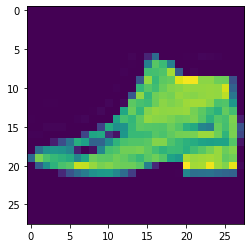

In [297]:
plt.imshow(X_train_cnn[2, :].reshape((28, 28)))

In [298]:
img_rows = 28
img_cols = 28
batch_size = 512
input_shape = (img_rows, img_cols, 1)
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], *input_shape)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], *input_shape)
X_val_cnn = X_val_cnn.reshape(X_val_cnn.shape[0], *input_shape)


print('x_train shape: {}'.format(X_train_cnn.shape))
print('x_test shape: {}'.format(X_test_cnn.shape))
print('x_val shape: {}'.format(X_val_cnn.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (60000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)


In [299]:
#Building Architecture of a CNN model
name = '1-layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,name='Conv2D'),
    MaxPooling2D(pool_size=(2, 2),name='MaxPool'),
    Dropout(0.2,name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax',name='Output')
], name=name)

name = '2-layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,name='Conv2D-1'),
    MaxPooling2D(pool_size=(2, 2),name='MaxPool'),
    Dropout(0.2,name='Dropout-1'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape,name='Conv2D-2'),
    Dropout(0.25,name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax',name='Output')
], name = name)

name = '3-layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=(2, 2),name='MaxPool'),
    Dropout(0.25,name='Dropout-1'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape,name='Conv2D-2'),
    Dropout(0.25,name='Dropout-2'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape,name='Conv2D-3'),
    Dropout(0.4,name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4,name='Dropout'),
    Dense(10, activation='softmax',name='Output')
], name = name)

cnn_models = [cnn_model_1,cnn_model_2,cnn_model_3]

In [286]:
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [300]:
#Compile the model
history_dict_cnn = {}

for model in cnn_models:
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy']
    )
    
    history_cnn = model.fit(
        X_train_cnn,y_train_cnn,
        batch_size = batch_size,
        epochs=50,
        verbose=1,
        validation_data=(X_val_cnn,y_val_cnn)   
    )

    history_dict_cnn[model.name] = history_cnn

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 22s 453us/step - loss: 0.7701 - acc: 0.7487 - val_loss: 0.4777 - val_acc: 0.8344
Epoch 2/50
48000/48000 [==============================] - 18s 368us/step - loss: 0.4417 - acc: 0.8480 - val_loss: 0.3979 - val_acc: 0.8629
Epoch 3/50
48000/48000 [==============================] - 17s 361us/step - loss: 0.3922 - acc: 0.8649 - val_loss: 0.3654 - val_acc: 0.8744
Epoch 4/50
48000/48000 [==============================] - 18s 376us/step - loss: 0.3644 - acc: 0.8734 - val_loss: 0.3541 - val_acc: 0.8779
Epoch 5/50
48000/48000 [==============================] - 18s 372us/step - loss: 0.3444 - acc: 0.8798 - val_loss: 0.3282 - val_acc: 0.8855
Epoch 6/50
48000/48000 [==============================] - 18s 368us/step - loss: 0.3246 - acc: 0.8863 - val_loss: 0.3382 - val_acc: 0.8814
Epoch 7/50
48000/48000 [==============================] - 18s 377us/step - loss: 0.3168 - acc: 0.8888 - val_loss: 0.

Epoch 9/50
48000/48000 [==============================] - 44s 926us/step - loss: 0.2719 - acc: 0.9033 - val_loss: 0.2695 - val_acc: 0.9044
Epoch 10/50
48000/48000 [==============================] - 45s 945us/step - loss: 0.2640 - acc: 0.9055 - val_loss: 0.2631 - val_acc: 0.9053
Epoch 11/50
48000/48000 [==============================] - 45s 934us/step - loss: 0.2574 - acc: 0.9081 - val_loss: 0.2505 - val_acc: 0.9111
Epoch 12/50
48000/48000 [==============================] - 44s 926us/step - loss: 0.2467 - acc: 0.9118 - val_loss: 0.2435 - val_acc: 0.9107
Epoch 13/50
48000/48000 [==============================] - 44s 925us/step - loss: 0.2394 - acc: 0.9127 - val_loss: 0.2410 - val_acc: 0.9148
Epoch 14/50
48000/48000 [==============================] - 44s 921us/step - loss: 0.2287 - acc: 0.9172 - val_loss: 0.2438 - val_acc: 0.9124
Epoch 15/50
48000/48000 [==============================] - 46s 965us/step - loss: 0.2212 - acc: 0.9192 - val_loss: 0.2553 - val_acc: 0.9062
Epoch 16/50
48000/480

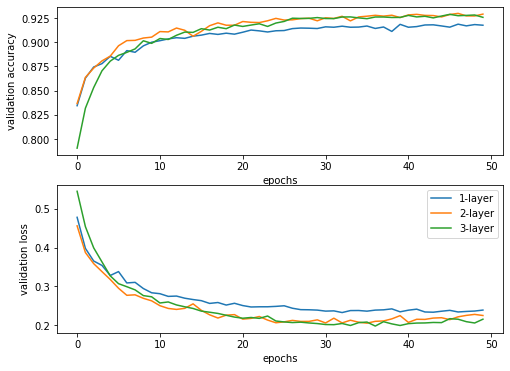

In [317]:
#Vizualize the model
fig, (ax1,ax2) = plt.subplots(2, figsize=(8,6))

for history_cnn in history_dict_cnn:
    val_acc = history_dict_cnn[history_cnn].history['val_acc']
    val_loss = history_dict_cnn[history_cnn].history['val_loss']
    ax1.plot(val_acc,label=history_cnn)
    ax2.plot(val_loss,label=history_cnn)

ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax1.set_xlabel('epochs')
ax2.set_xlabel('epochs')
ax2.legend()
ax2.legend()
plt.show()

In [303]:
#Confusion Matrix of a CNN model
import itertools
def plot_confusion_matrix_cnn(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

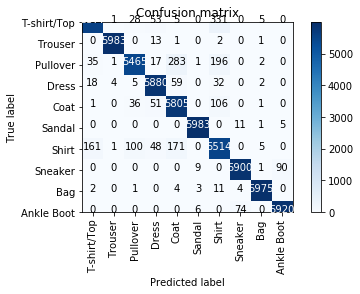

In [304]:
Y_pred_cnn = model.predict(X_test_cnn)
# Convert predictions classes to one hot vectors 
Y_pred_classes_cnn = np.argmax(Y_pred_cnn,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix 
confusion_mtx_cnn = confusion_matrix(y_test_cnn, Y_pred_classes_cnn) 
# plot the confusion matrix
plot_confusion_matrix_cnn(confusion_mtx_cnn, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [306]:
#classification report precision recall f1-score support
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(y_test_cnn, Y_pred_classes_cnn, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.96      0.93      0.95      6000
     Trouser       1.00      1.00      1.00      6000
    Pullover       0.97      0.91      0.94      6000
       Dress       0.97      0.98      0.97      6000
        Coat       0.92      0.97      0.94      6000
      Sandal       1.00      1.00      1.00      6000
       Shirt       0.89      0.92      0.90      6000
     Sneaker       0.99      0.98      0.98      6000
         Bag       1.00      1.00      1.00      6000
  Ankle Boot       0.98      0.99      0.99      6000

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [309]:
#Prediction of correct class
correct = []
for i in range(len(y_test_cnn)):
    if(Y_pred_classes_cnn[i] == y_test_cnn[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : T-shirt/top\nActual Label : T-shirt/top')

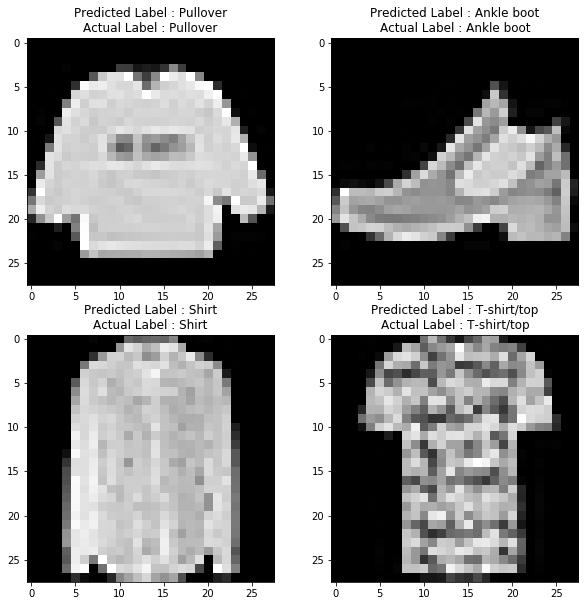

In [310]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test_cnn[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[correct[0]]]))
ax[0,1].imshow(X_test_cnn[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[correct[1]]]))
ax[1,0].imshow(X_test_cnn[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[correct[2]]]))
ax[1,1].imshow(X_test_cnn[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[correct[3]]]))

In [311]:
#Prediction of incorrect class
incorrect = []
for i in range(len(y_test_cnn)):
    if(not Y_pred_classes_cnn[i] == y_test_cnn[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Shirt\nActual Label : T-shirt/top')

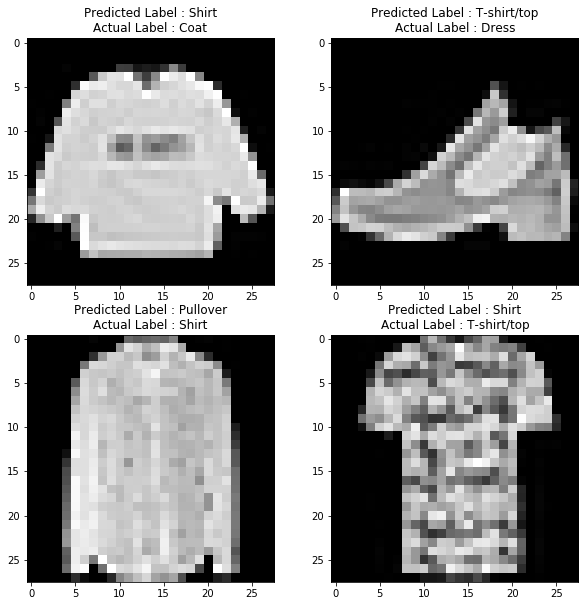

In [312]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test_cnn[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[incorrect[0]]]))
ax[0,1].imshow(X_test_cnn[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[incorrect[1]]]))
ax[1,0].imshow(X_test_cnn[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[incorrect[2]]]))
ax[1,1].imshow(X_test_cnn[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes_cnn[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_test_cnn[incorrect[3]]]))